In [50]:
import urllib.request
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import pywt

In [51]:
def show(img):
    plt.figure(figsize = (30,30))
    plt.imshow(img, cmap="gray")

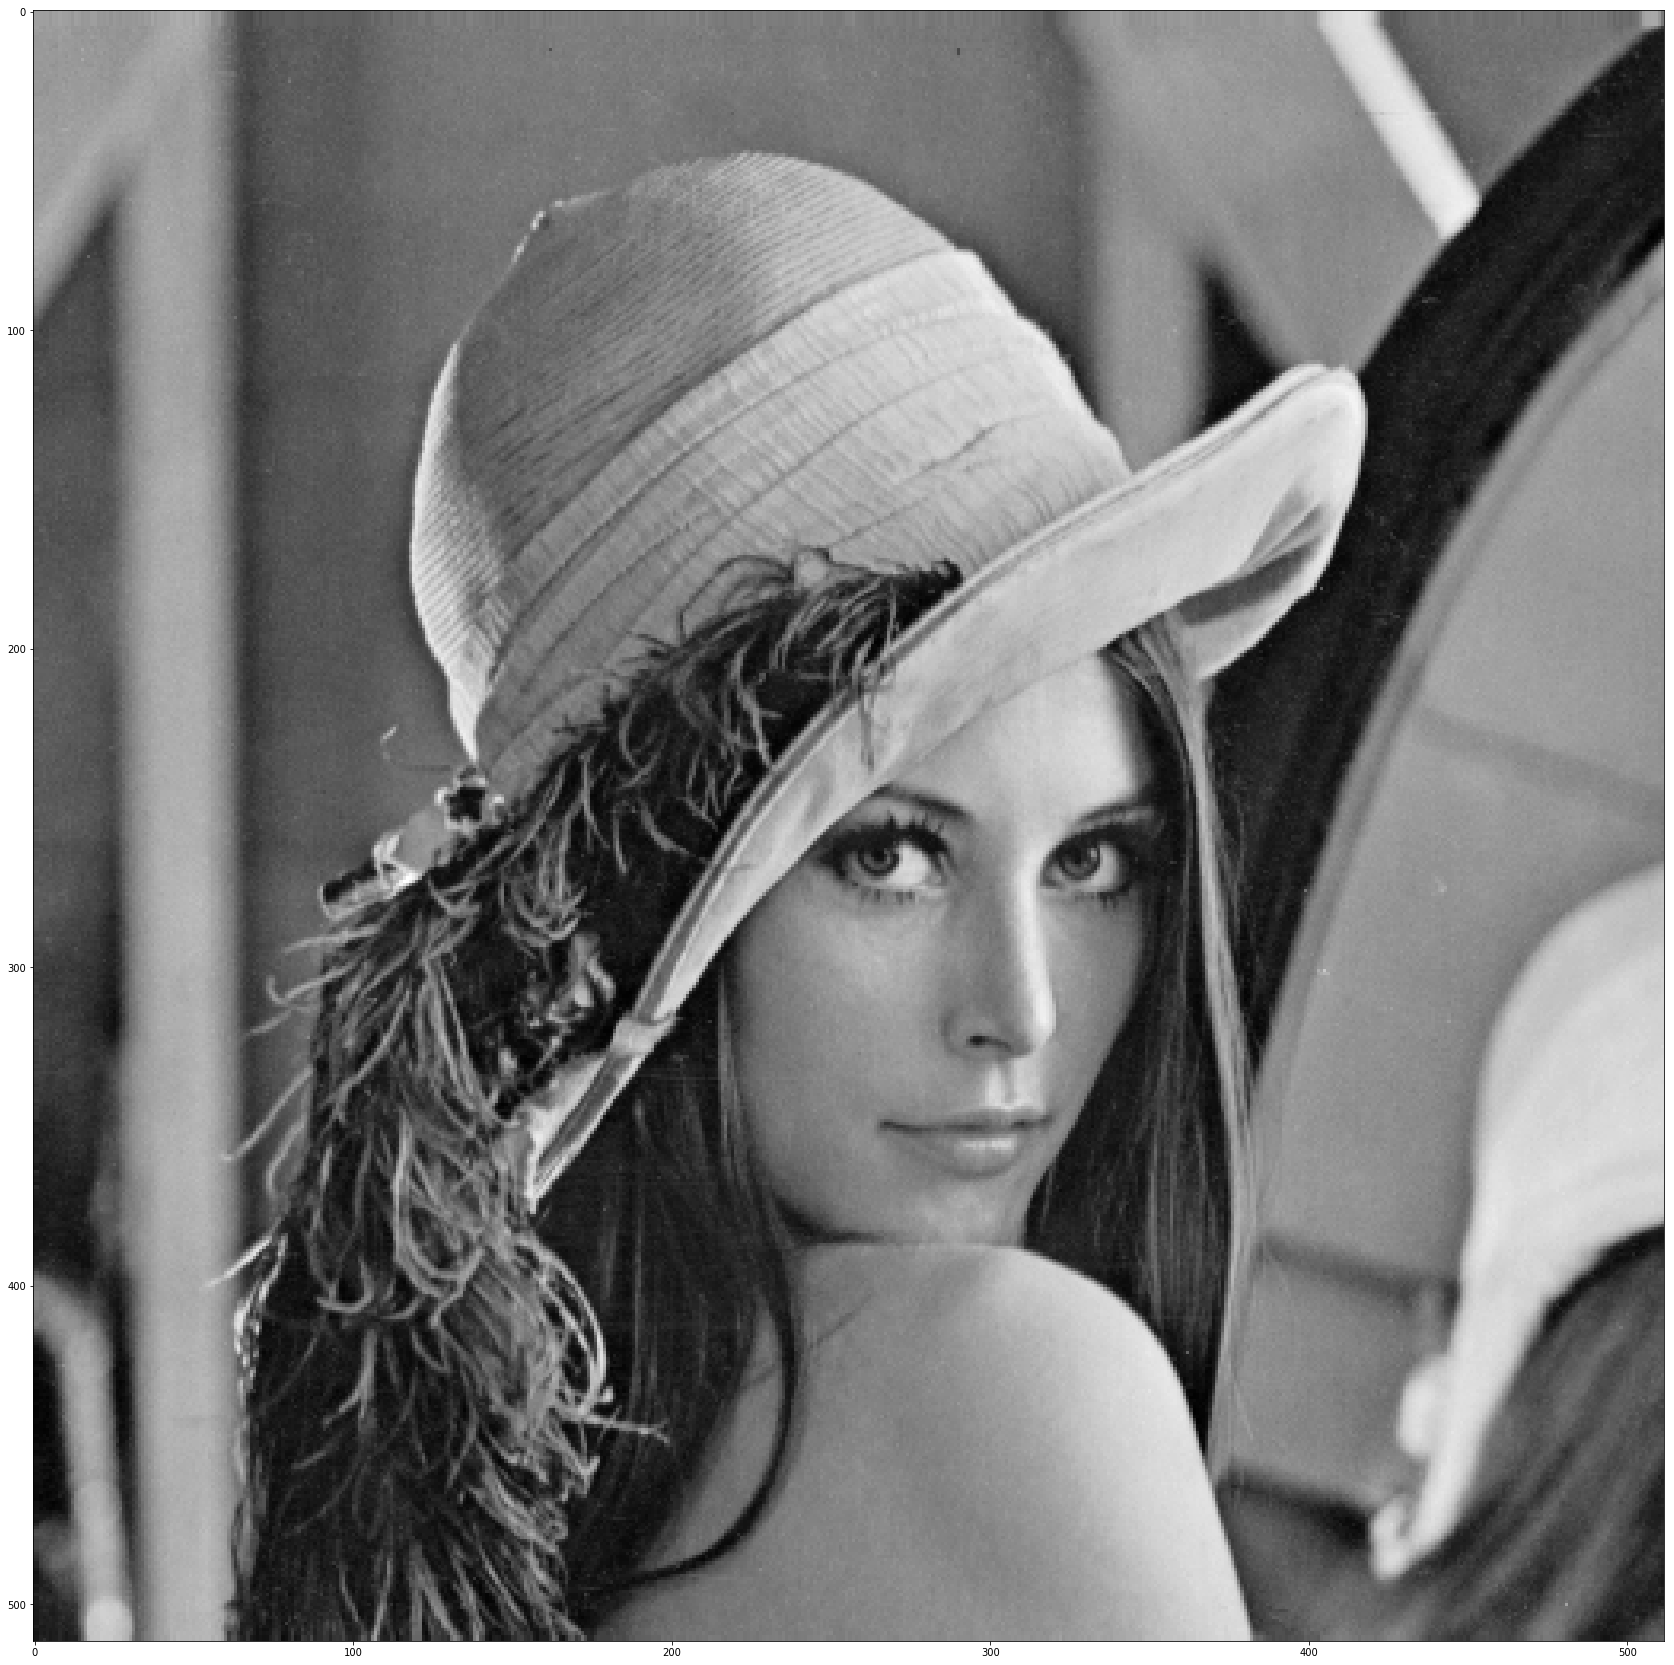

In [52]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
Y = Y.astype(np.float32)
show(Y)

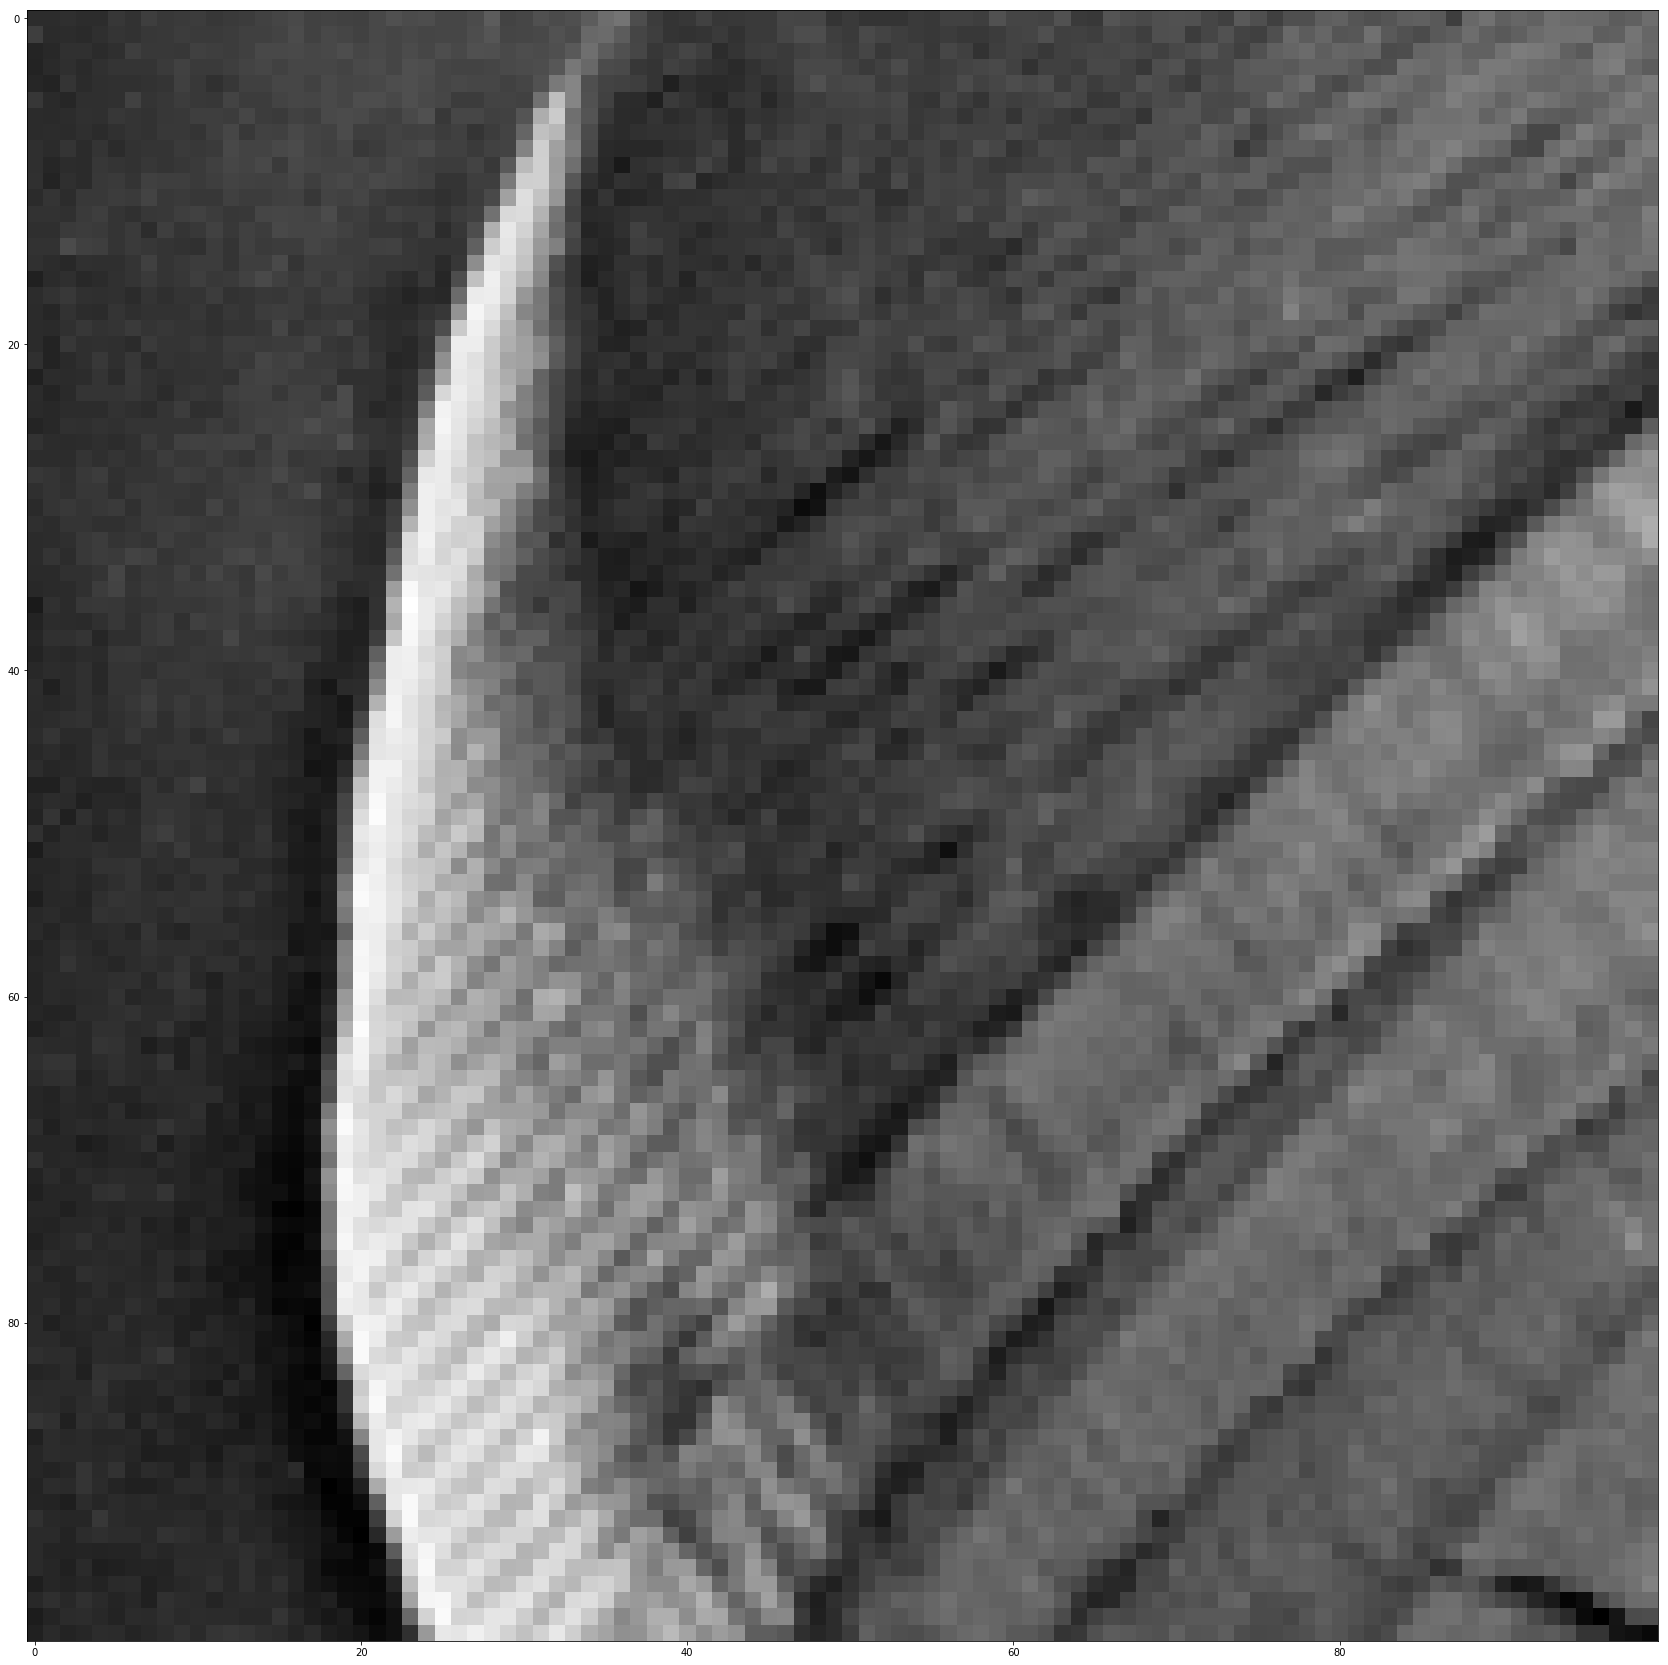

In [53]:
show(Y[100:200, 100:200])

In [54]:
print(Y[100:200, 100:200])

[[102. 102. 103. ... 130. 132. 140.]
 [112. 101. 102. ... 132. 144. 136.]
 [ 97.  99. 104. ... 147. 143. 137.]
 ...
 [ 99. 103.  99. ... 128. 139. 140.]
 [ 92.  97. 101. ...  88. 120. 121.]
 [ 95. 100.  96. ...  87.  85.  80.]]


In [55]:
Y.max()

245.0

In [56]:
Y.min()

25.0

In [104]:
# Calculamos la DWT de la imagen original
#wavelet = 'rbio1.1'
#wavelet = 'rbio3.5'
wavelet = 'db5'
#wavelet = 'db25'
#wavelet = 'rbio6.8'
L, H = pywt.dwt2(Y, wavelet, 'per')

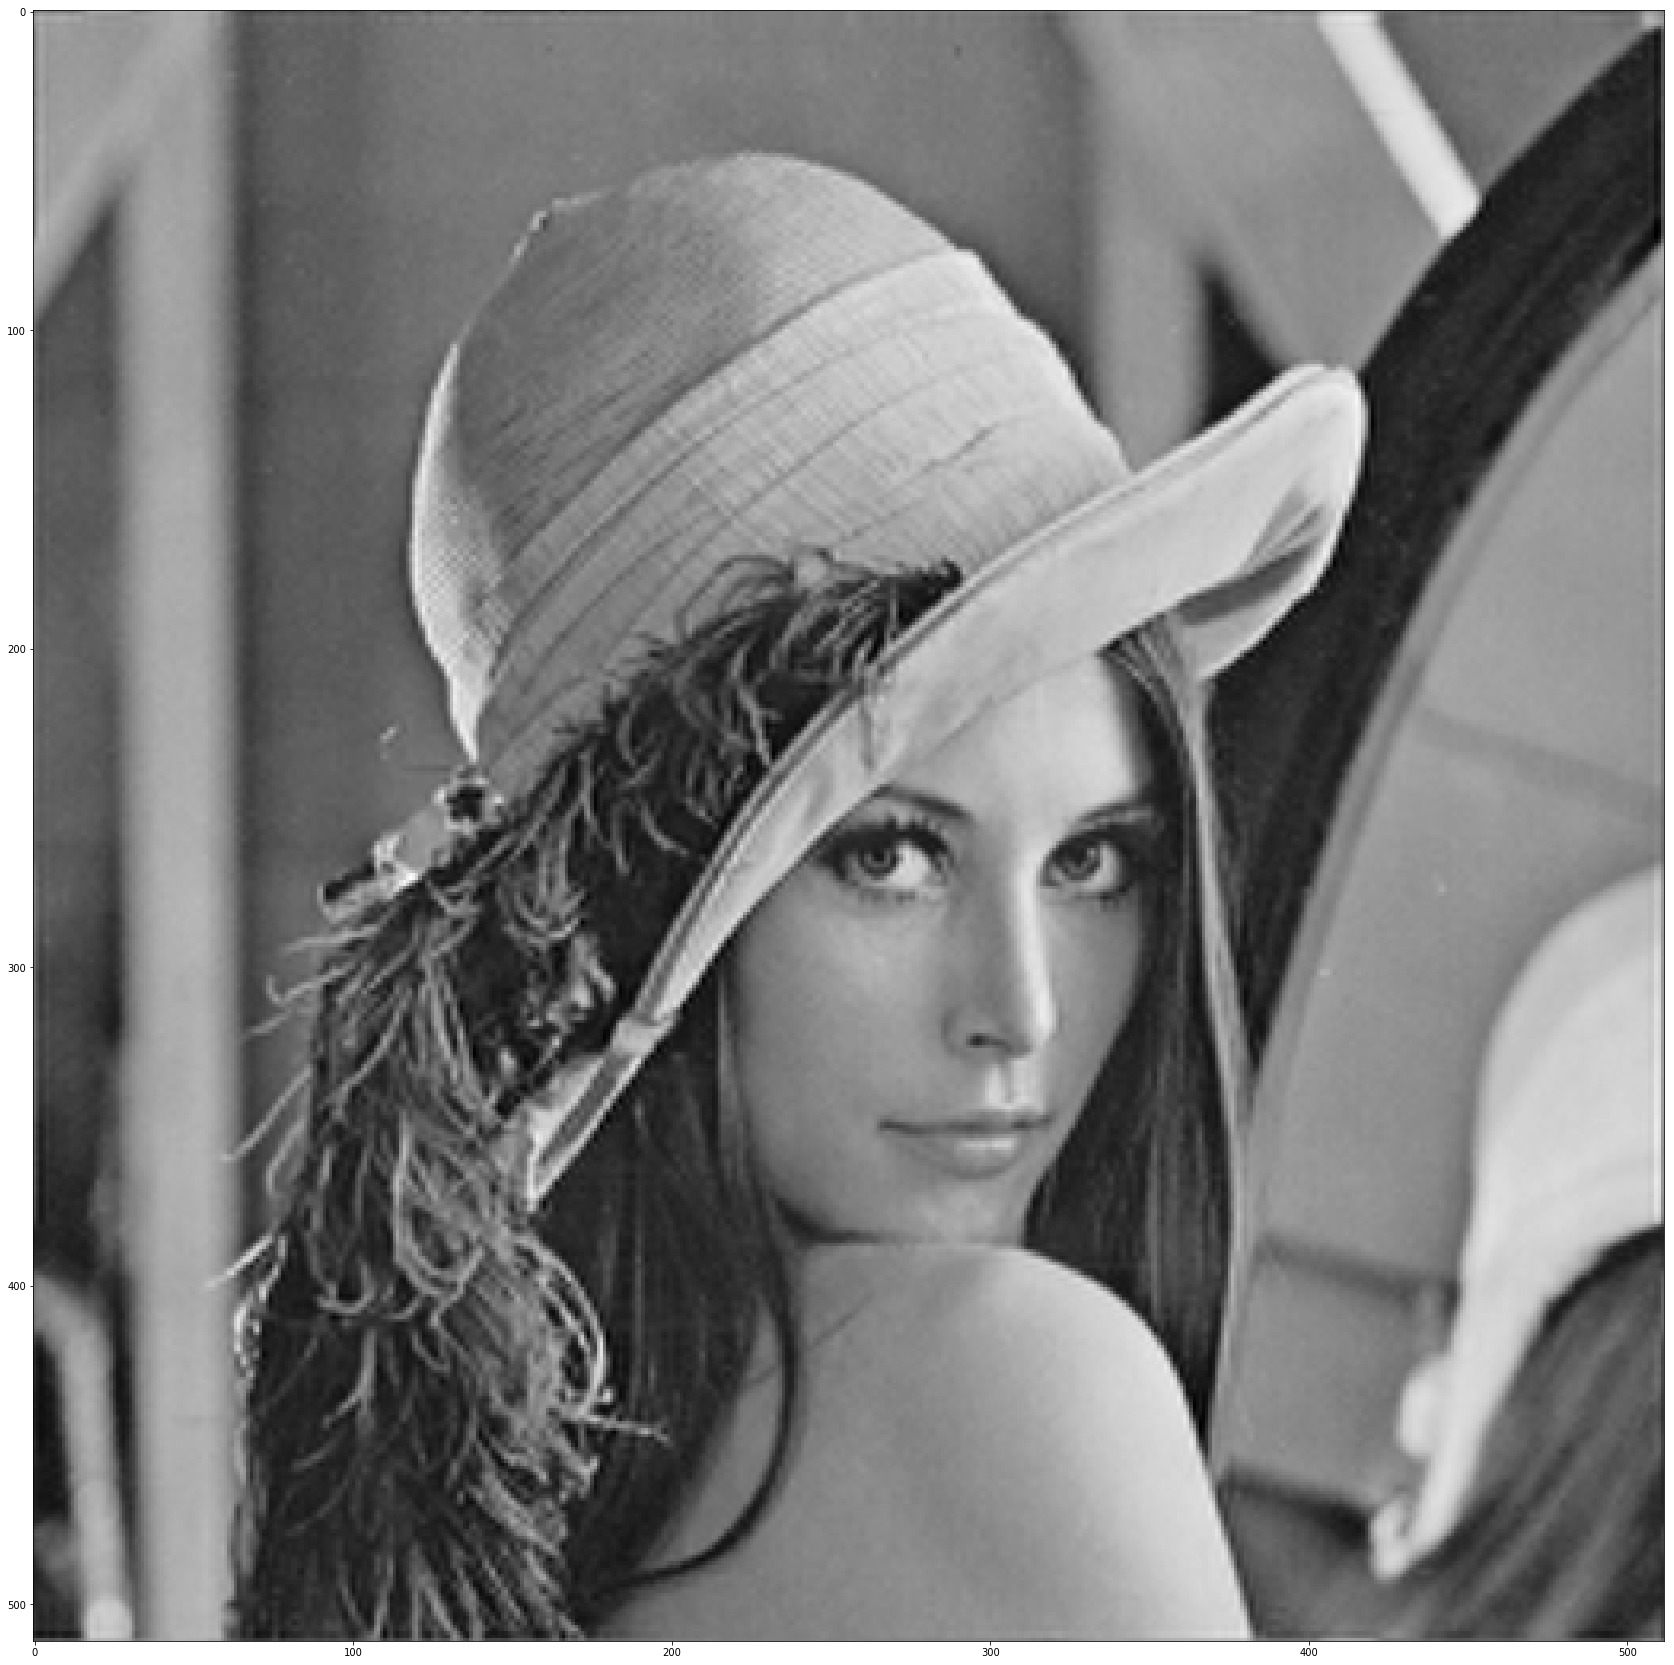

In [105]:
zero = np.zeros((L.shape[0], L.shape[1]))
L_big = pywt.idwt2((L, (zero, zero, zero)), wavelet, 'per')
show(L_big)

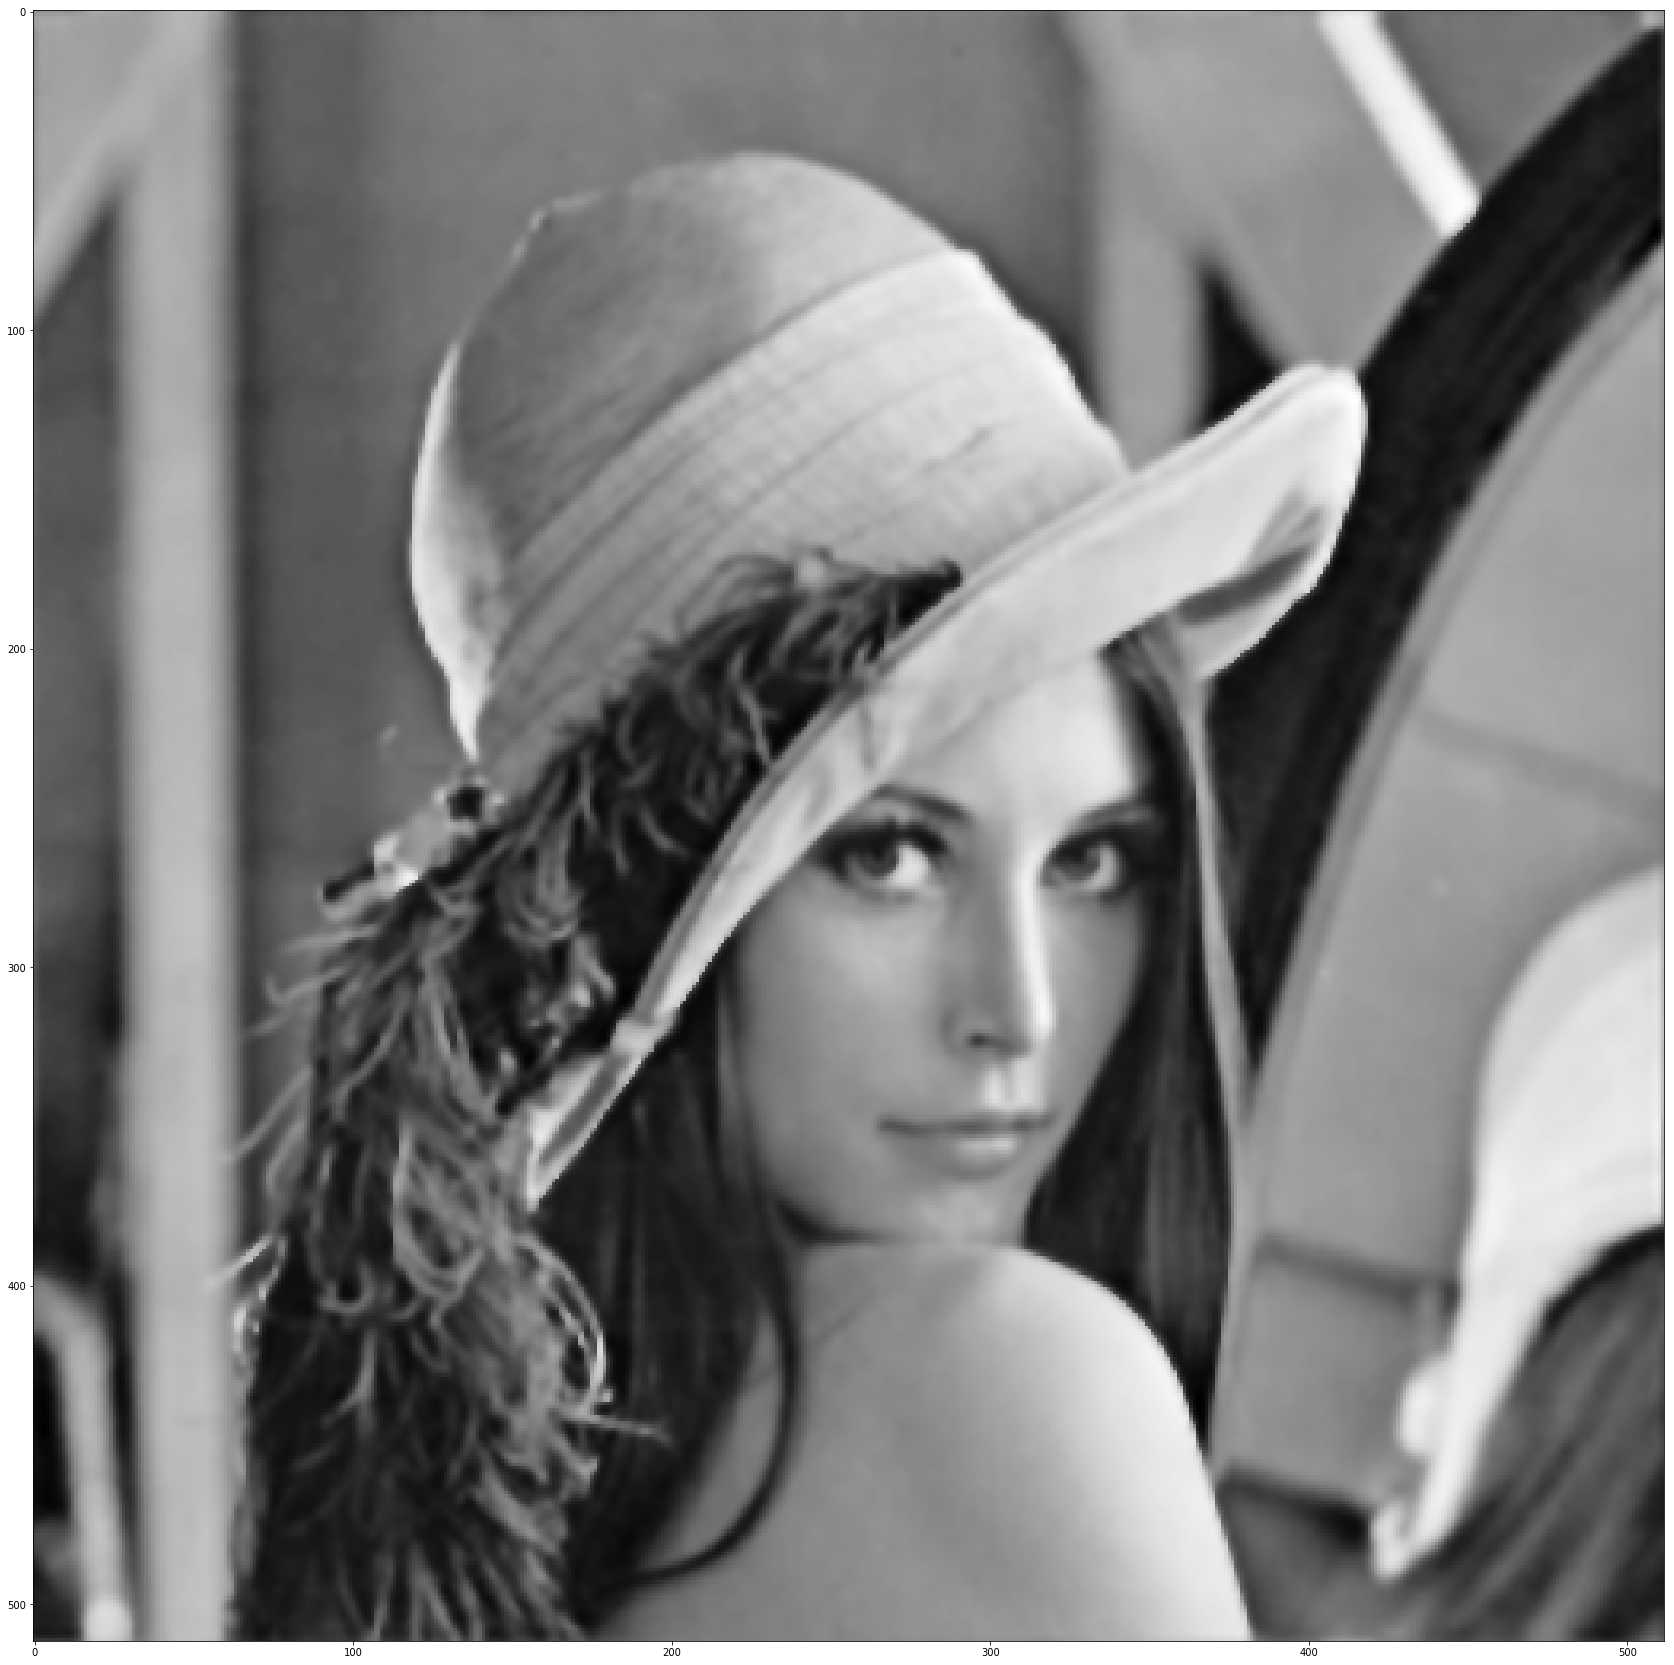

In [106]:
from medpy.filter.smoothing import anisotropic_diffusion
L_big_filtered = anisotropic_diffusion(L_big, niter=10)
show(L_big_filtered)

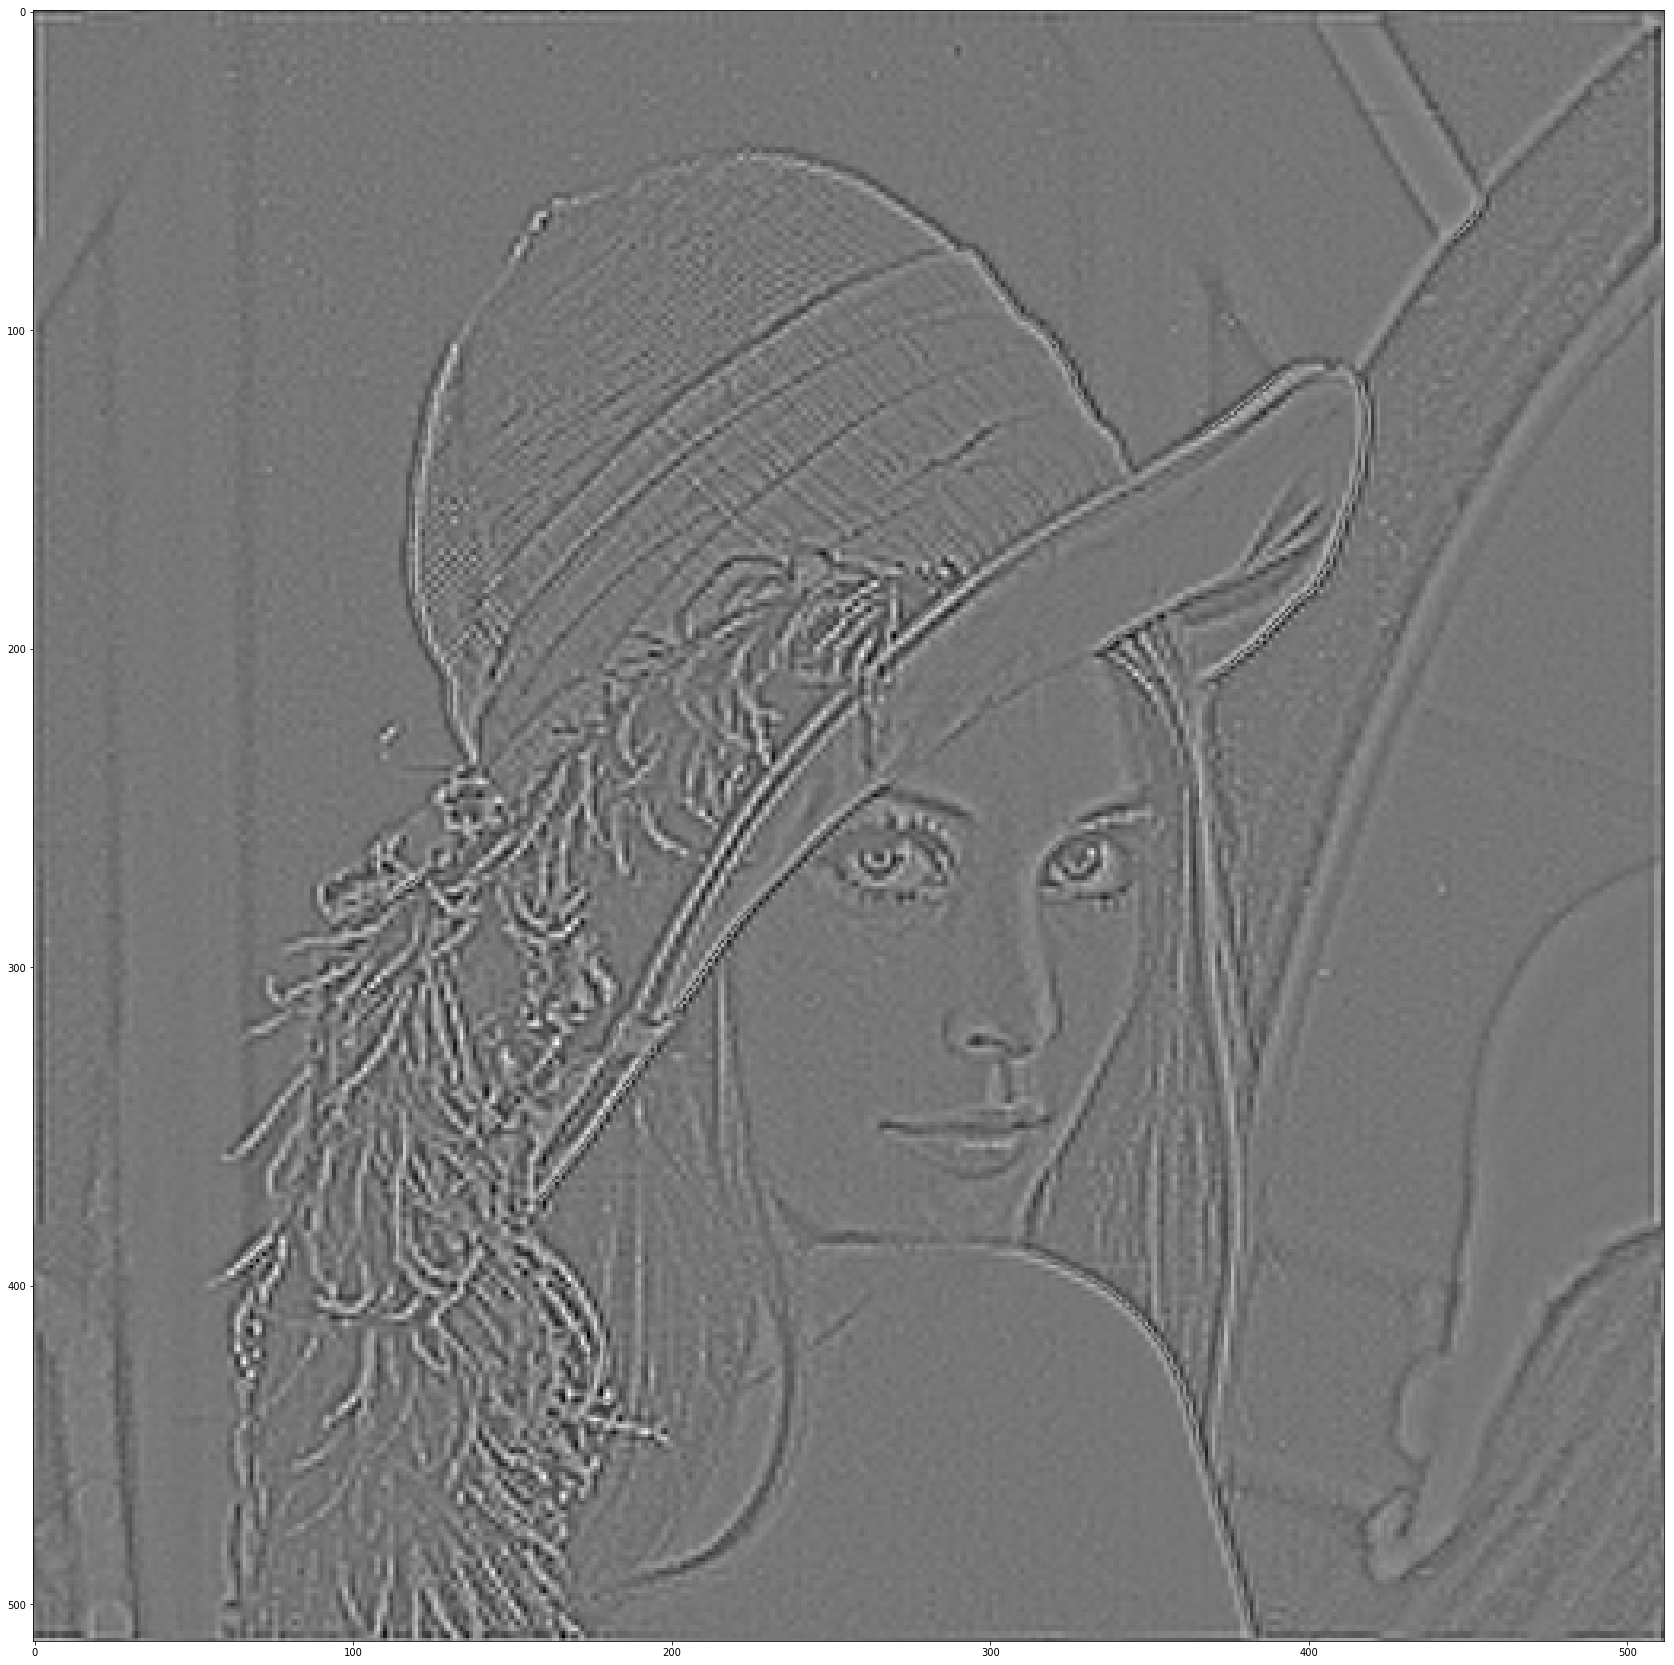

In [107]:
diff = L_big - L_big_filtered
show(diff)

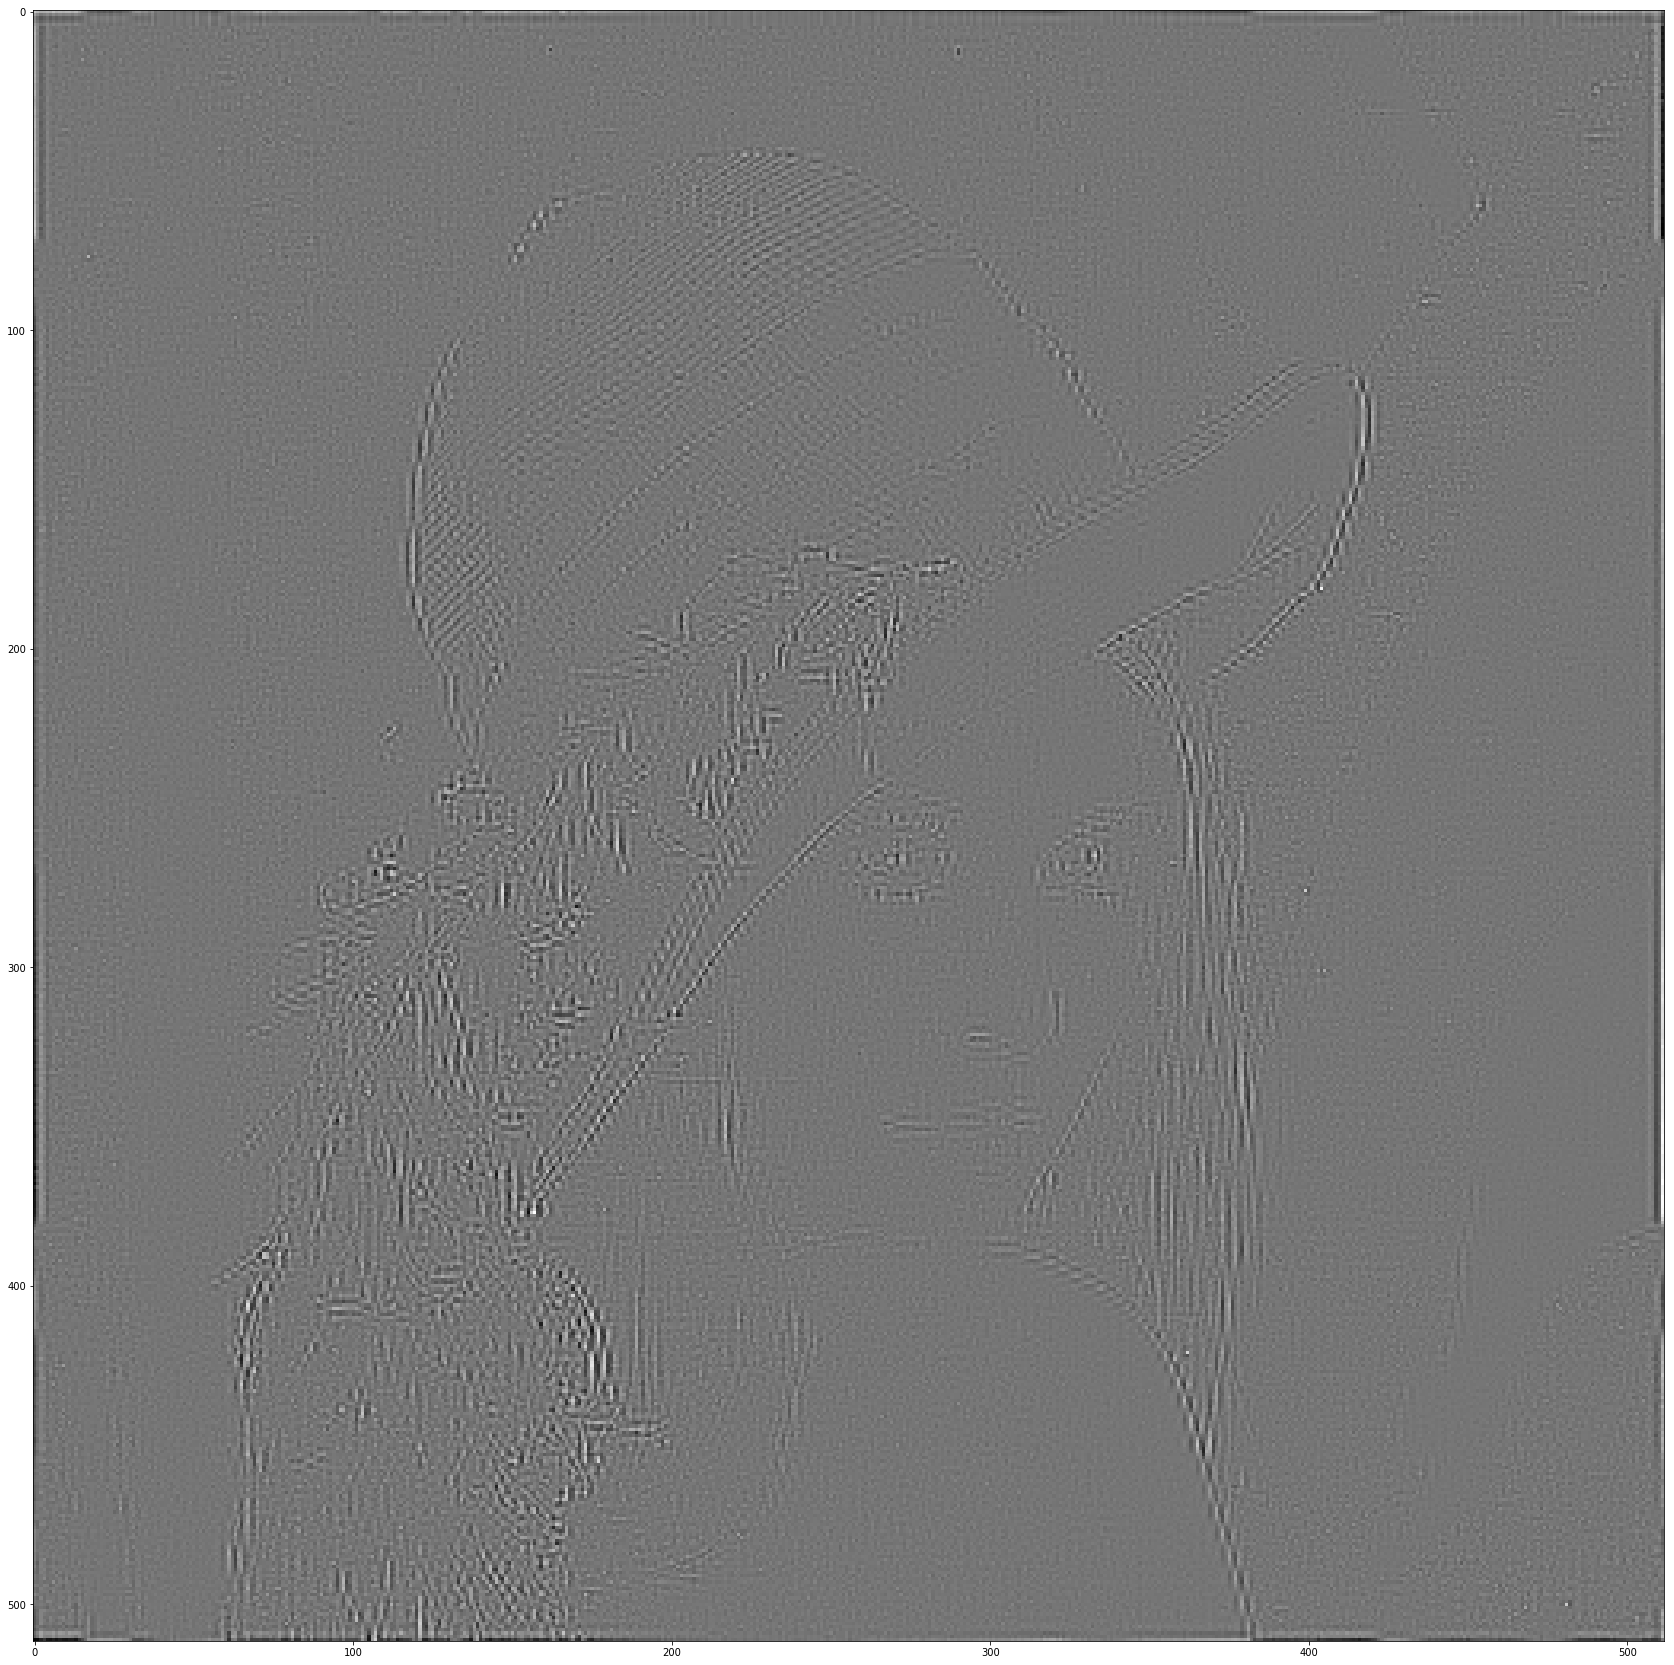

In [108]:
# Objective
L, H = pywt.dwt2(Y, wavelet, 'per')
zero = np.zeros((L.shape[0], L.shape[1]))
_H_ = pywt.idwt2((zero, H), wavelet, 'per')
show(_H_)

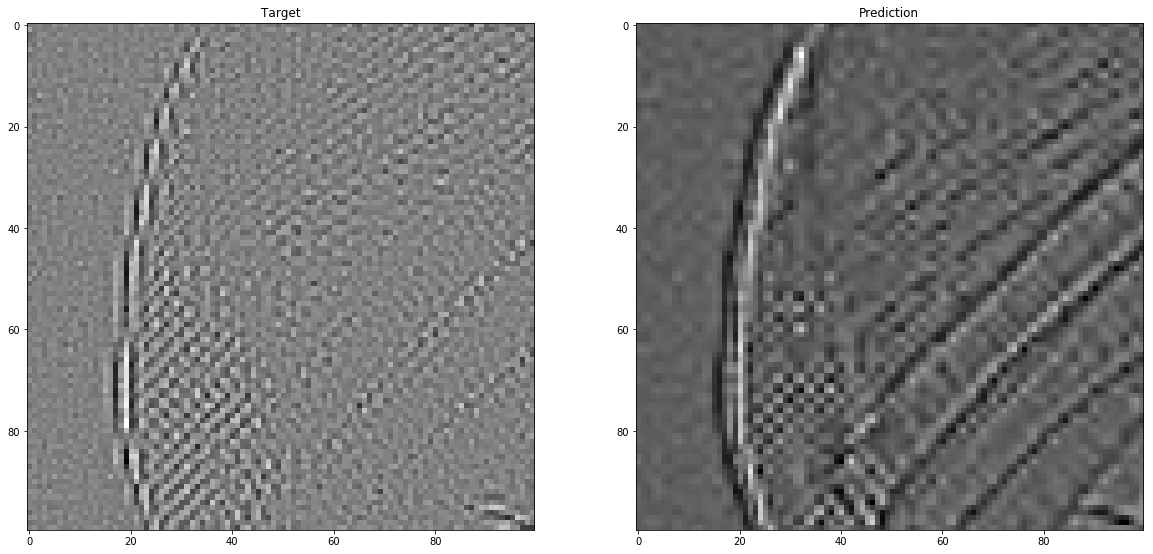

In [109]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,20))
ax0.imshow(_H_[100:200, 100:200], cmap='gray', interpolation='nearest')
#ax0.imshow(image, cmap='gray')
ax0.set_title('Target')
ax1.imshow(diff[100:200, 100:200], cmap='gray', interpolation='nearest')
#ax1.imshow(filled, cmap='gray')
ax1.set_title('Prediction')
plt.show()

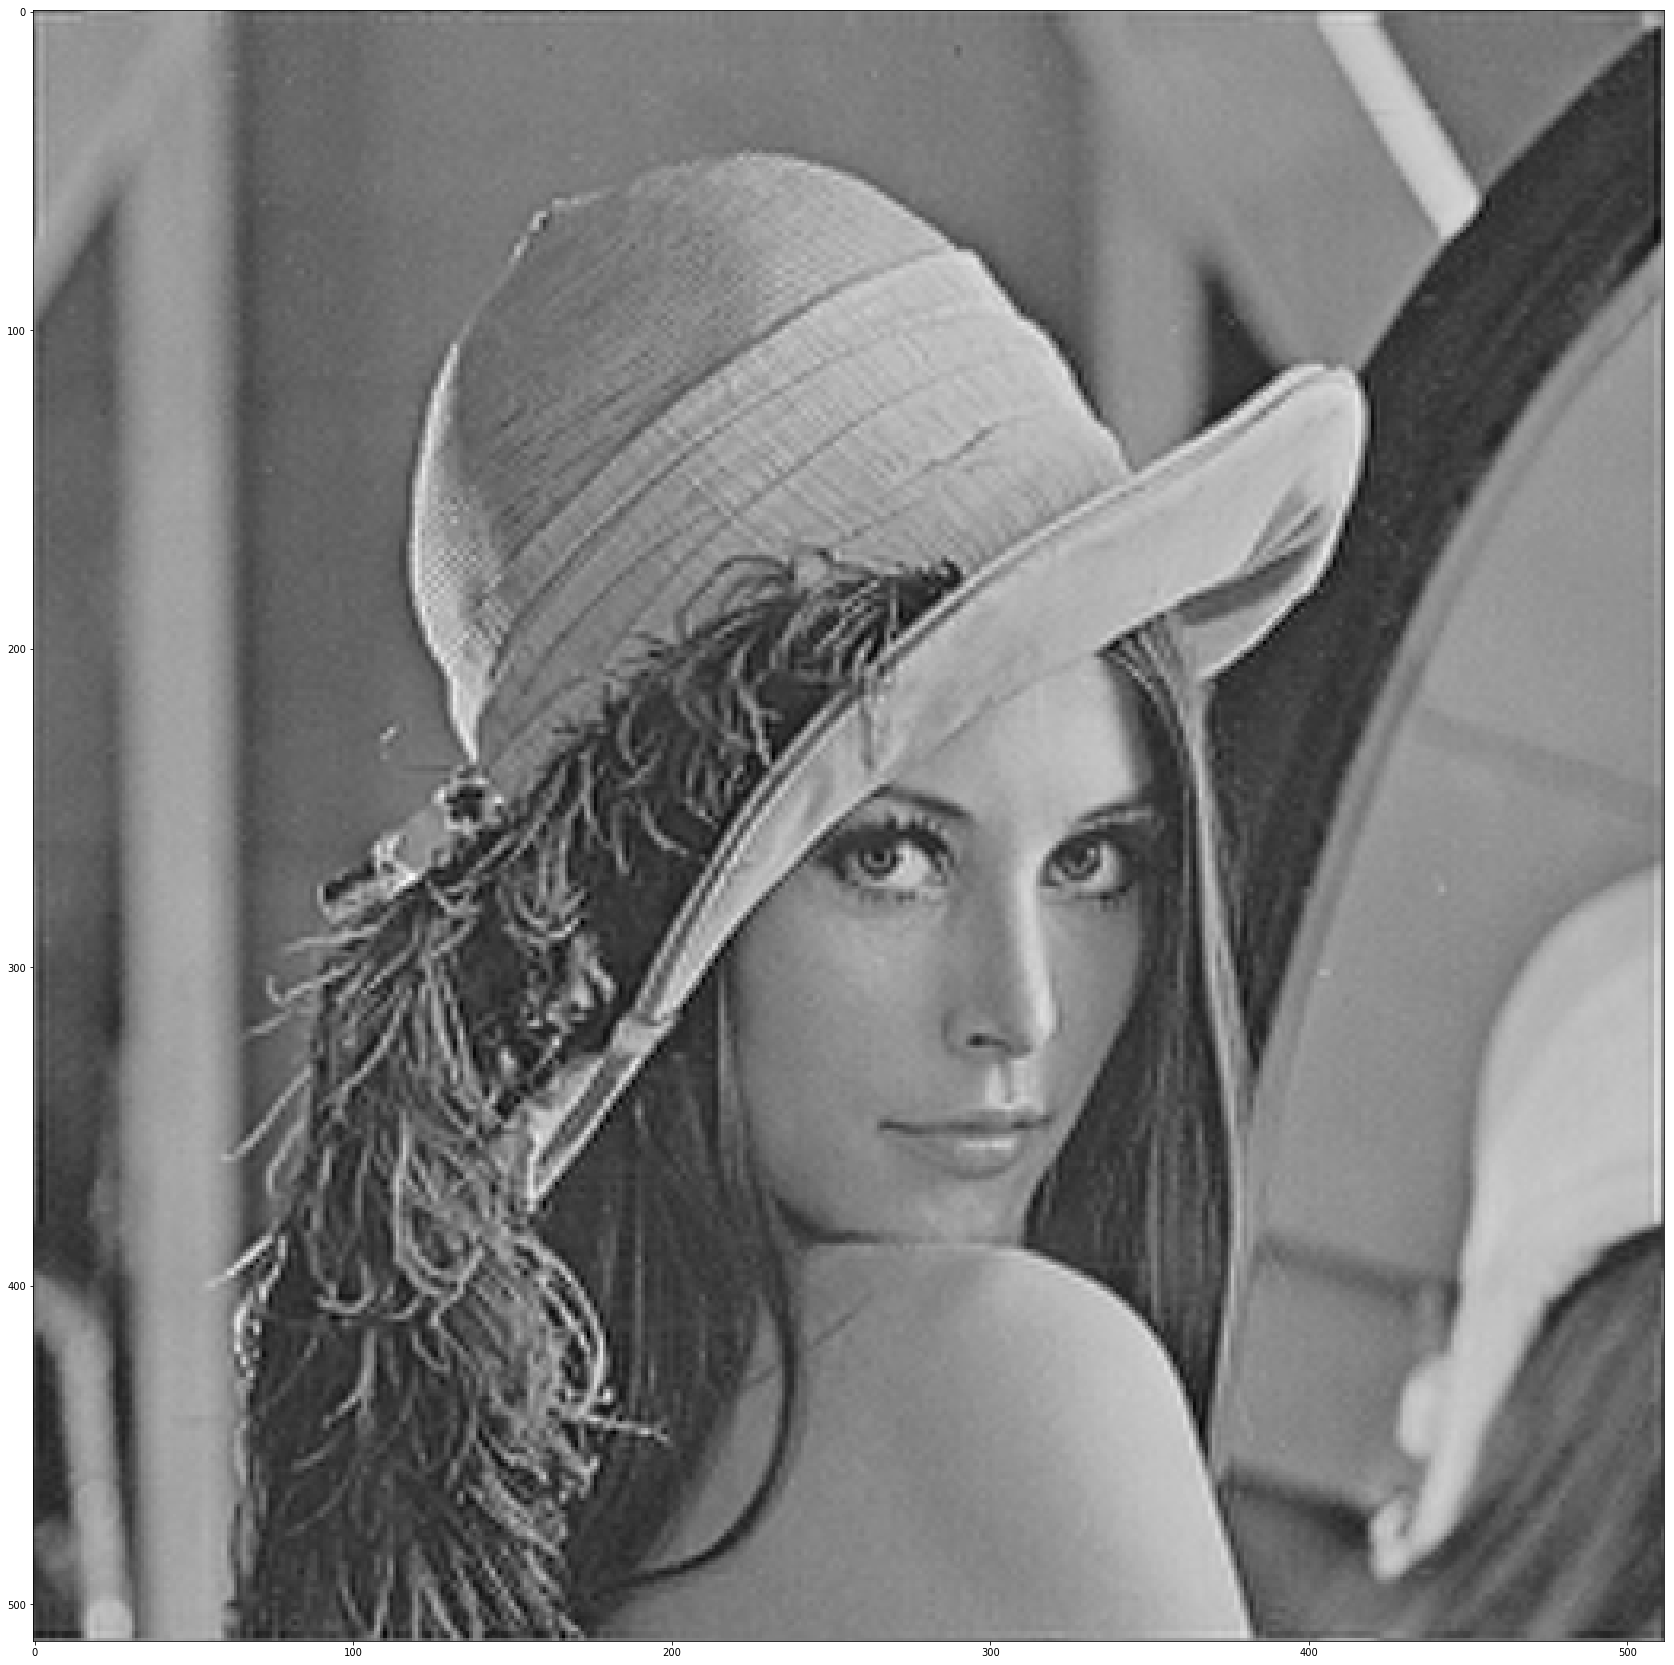

In [110]:
reconstruction_without_H = (L_big + diff)/2
show(reconstruction_without_H)